In [1]:
# Import the necceasary packages

# Numerical Operations
import pandas as pd
import numpy as np
import os

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# for better visualization
plt.style.use('ggplot')

## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
tran=pd.read_csv(r"F:\PYTHON DATASCIENCE\retail case study\Transactions.csv")
customer=pd.read_csv(r"F:\PYTHON DATASCIENCE\retail case study\Customer.csv")
prod_cat_info=pd.read_csv(r"F:\PYTHON DATASCIENCE\retail case study\prod_cat_info.csv")
a=pd.merge(left=tran,right=prod_cat_info,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])
Customer_Final=pd.merge(left=a,right=customer,left_on='cust_id',right_on='customer_Id')
Customer_Final=Customer_Final.drop(columns=['customer_Id','prod_sub_cat_code'])
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
2,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,Books,DIY,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,Electronics,Personal Appliances,26-09-1981,M,5.0
4,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,Footwear,Women,26-09-1981,M,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,87125650,268666,9/8/2011,1,4,-5,-359,188.475,-1983.475,e-Shop,Bags,Mens,11-12-1978,M,3.0
23049,87125650,268666,5/8/2011,1,4,5,359,188.475,1983.475,e-Shop,Bags,Mens,11-12-1978,M,3.0
23050,34764580226,269784,20-07-2011,1,4,1,1057,110.985,1167.985,Flagship store,Bags,Mens,26-04-1986,F,7.0
23051,80809115393,268084,1/4/2011,1,4,4,873,366.660,3858.660,TeleShop,Bags,Mens,18-11-1970,M,1.0


## 2. Prepare a summary report for the merged data set.

###  a. Get the column names and their corresponding data types

In [4]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [5]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

In [6]:
Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date)
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB)

In [7]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

###  b. Top/Bottom 10 observations

In [8]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
2,13181563739,270351,2011-12-13,6,5,1,1048,110.040,1158.040,e-Shop,Books,DIY,1981-09-26,M,5.0
3,12236277258,270351,2013-03-18,8,3,3,1030,324.450,3414.450,e-Shop,Electronics,Personal Appliances,1981-09-26,M,5.0
4,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,Footwear,Women,1981-09-26,M,5.0
5,73713102191,268867,2014-02-15,1,1,1,714,74.970,788.970,MBR,Clothing,Women,1987-10-24,F,4.0
6,25509331876,268867,2011-12-09,12,6,-4,-416,174.720,-1838.720,e-Shop,Home and kitchen,Tools,1987-10-24,F,4.0
7,25509331876,268867,2011-08-09,12,6,-4,-416,174.720,-1838.720,e-Shop,Home and kitchen,Tools,1987-10-24,F,4.0
8,25509331876,268867,2011-02-09,12,6,4,416,174.720,1838.720,e-Shop,Home and kitchen,Tools,1987-10-24,F,4.0
9,38621155609,268867,2012-08-25,10,6,3,428,134.820,1418.820,e-Shop,Home and kitchen,Kitchen,1987-10-24,F,4.0


In [9]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,85300368295,272913,2011-12-17,1,4,3,518,163.170,1717.170,MBR,Bags,Mens,1982-07-17,F,2.0
23044,88167450510,268028,2011-08-11,1,4,-5,-608,319.200,-3359.200,Flagship store,Bags,Mens,1980-03-06,M,7.0
23045,88167450510,268028,2011-03-11,1,4,5,608,319.200,3359.200,Flagship store,Bags,Mens,1980-03-06,M,7.0
23046,40528384413,273953,2011-09-22,1,4,2,1148,241.080,2537.080,Flagship store,Bags,Mens,1991-02-08,M,8.0
23047,84009622150,273116,2011-08-26,1,4,2,1474,309.540,3257.540,e-Shop,Bags,Mens,1980-10-13,M,5.0
23048,87125650,268666,2011-09-08,1,4,-5,-359,188.475,-1983.475,e-Shop,Bags,Mens,1978-11-12,M,3.0
23049,87125650,268666,2011-05-08,1,4,5,359,188.475,1983.475,e-Shop,Bags,Mens,1978-11-12,M,3.0
23050,34764580226,269784,2011-07-20,1,4,1,1057,110.985,1167.985,Flagship store,Bags,Mens,1986-04-26,F,7.0
23051,80809115393,268084,2011-01-04,1,4,4,873,366.660,3858.660,TeleShop,Bags,Mens,1970-11-18,M,1.0
23052,12933894691,272706,2011-01-31,1,4,5,361,189.525,1994.525,MBR,Bags,Mens,1974-09-03,M,8.0


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [10]:
Continuous_var_data=Customer_Final[['Qty','Rate','Tax','total_amt']]
Categorical_var_data=Customer_Final[['transaction_id','cust_id','prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_subcat','Gender','city_code']].astype(object)

In [11]:
Continuous_var_data.describe().loc['min':'max',:]

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
25%,1.0,312.0,98.280,762.450
50%,3.0,710.0,199.080,1754.740
75%,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


###  d. Frequency tables for all the categorical variables

In [12]:
Categorical_var_data.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Store_type,prod_cat,prod_subcat,Gender,city_code
count,23053,23053,23053,23053,23053,23053,23053,23044,23045.0
unique,20878,5506,12,6,4,6,18,2,10.0
top,32263938079,269449,4,5,e-Shop,Books,Women,M,4.0
freq,4,13,4002,6069,9311,6069,3048,11811,2422.0


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

### For Continuous variables:

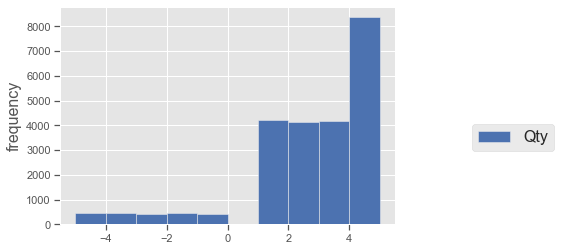

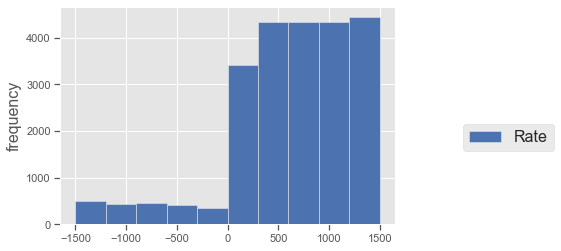

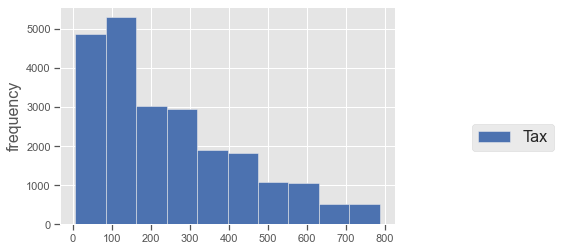

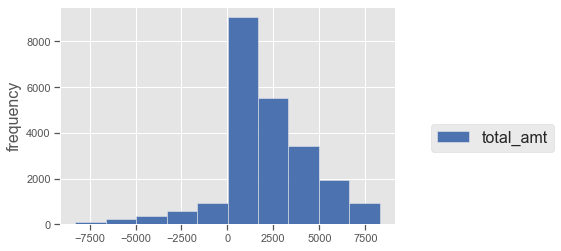

In [13]:
for i in Continuous_var_data.columns:
    plt.hist(Customer_Final[i],label=i,color='b')
    plt.ylabel('frequency',fontsize=16)
    plt.legend(bbox_to_anchor=(1.5,0.5),fontsize=16)
    plt.show()

### for date variables

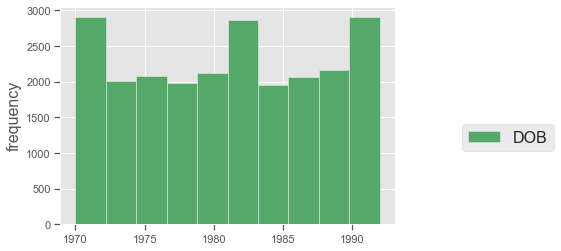

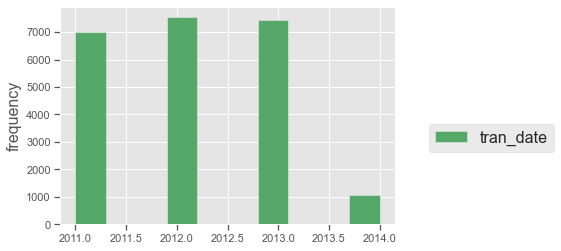

In [14]:
# for date variables, we cannot directly create histograms, we derive some variables and then create histograms
date_col=['DOB','tran_date']
for i in date_col:
    plt.hist(Customer_Final[i].dt.year,label=i,bins=10,color='g')
    plt.ylabel('frequency',fontsize=16)
    plt.legend(bbox_to_anchor=(1.5,0.5),fontsize=16)
    plt.show()

### for categorical variables:

In [15]:
# since cust_id,tran_id has large number of unique values and they are primary keys , we cannot get a frequency bars
categorical_var=['prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_subcat','Gender','city_code']

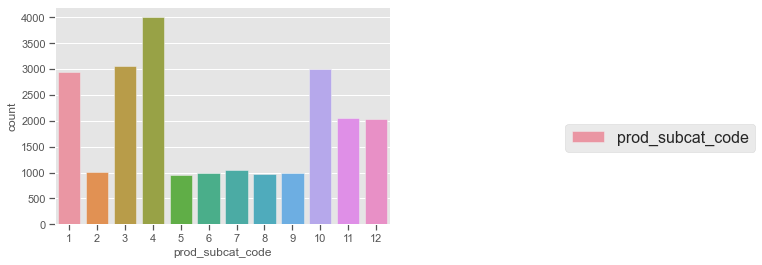

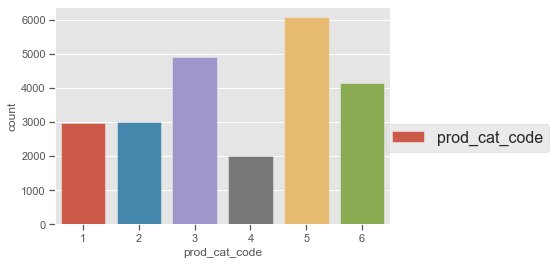

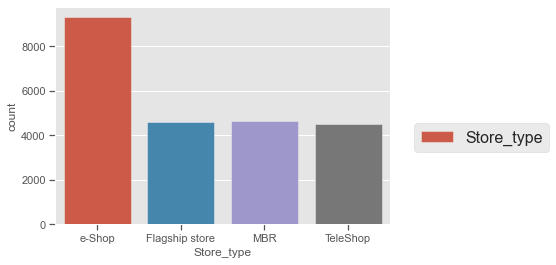

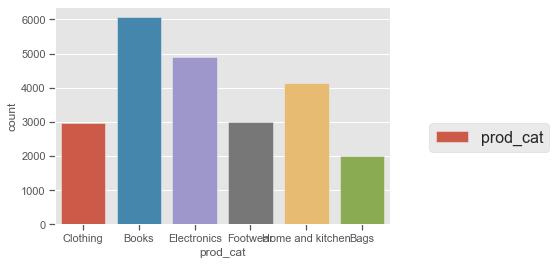

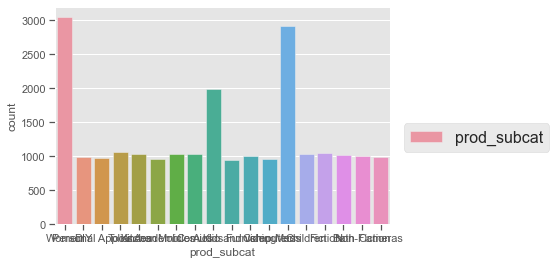

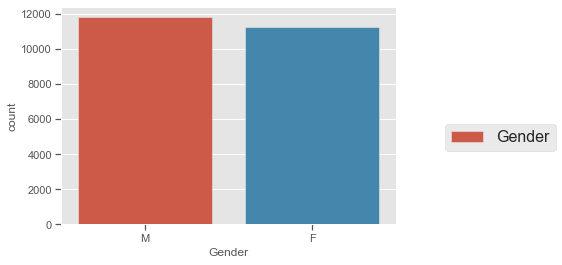

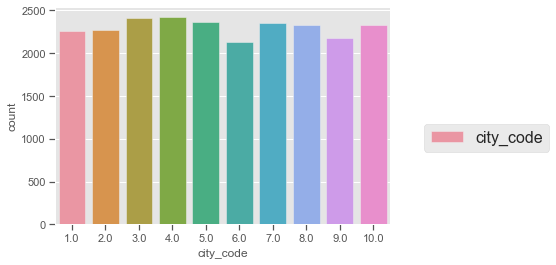

In [16]:
for i in categorical_var:
    sns.countplot(Customer_Final[i],label=i)
    plt.legend(bbox_to_anchor=(1.5,0.5),fontsize=16)
    plt.show()

## 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [17]:
max_date=Customer_Final.tran_date.max()
min_date=Customer_Final.tran_date.min()
a=max_date-min_date
print(f'Time period of the available transaction data is from {min_date} to {max_date} \nThe duration of avaialble transaction data is {a}')

Time period of the available transaction data is from 2011-01-02 00:00:00 to 2014-12-02 00:00:00 
The duration of avaialble transaction data is 1430 days 00:00:00


### b. Count of transactions where the total amount of transaction was negative

In [18]:
b4=Customer_Final[Customer_Final.total_amt <0].transaction_id.count()
print('Count of transactions where the total amount of transaction was negative is',b4)

Count of transactions where the total amount of transaction was negative is 2177


## 5. Analyze which product categories are more popular among females vs male customers.

Footwear,Bags are more popular categories among Females 
Books,Clothing,Electronics,Home and kitchen are more popular categories among Males


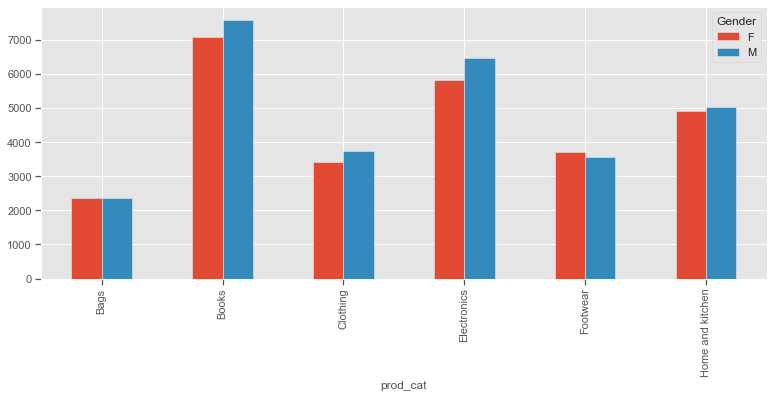

In [19]:
pd.pivot_table(data=Customer_Final,index='prod_cat',columns='Gender',values='Qty',aggfunc='sum').plot.bar(figsize=(13,5))
print('Footwear,Bags are more popular categories among Females \nBooks,Clothing,Electronics,Home and kitchen are more popular categories among Males')

## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [20]:
Q6=(Customer_Final.groupby('city_code')[['cust_id']].count()/(Customer_Final.cust_id.count())*100)
Q6_ans=Q6.sort_values(by='cust_id',ascending=False).head(1)
print(f'City code which has the maximum customers is {Q6_ans.index[0]} with percentage of {Q6_ans.iloc[0,0]}')


City code which has the maximum customers is 4.0 with percentage of 10.506224786361862


## 7.Which store type sells the maximum products by value and by quantity?

In [21]:
Q7=Customer_Final.query('Qty>0').groupby('Store_type')[['total_amt','Qty']].sum()
Q7_ans=Q7.sort_values(by=['total_amt','Qty'],ascending=False).head(1).index[0]
print('store type which sells the maximum products by value and by quantity is :',Q7_ans)


store type which sells the maximum products by value and by quantity is : e-Shop


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [22]:
Q8=Customer_Final.query('Store_type== "Flagship store" and  prod_cat in ["Electronics","Clothing"]')
Q8_ans=Q8.total_amt.sum()
print('the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is : ',Q8_ans)

the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is :  3409559.2699999996


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [23]:
Q9=Customer_Final.query('Gender=="M" and prod_cat == "Electronics"')
Q9_ans=Q9.total_amt.sum()
print('the total amount earned from "Male" customers under the "Electronics" category is : ',Q9_ans)

the total amount earned from "Male" customers under the "Electronics" category is :  5703109.425


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [24]:
Q10=Customer_Final.query('total_amt>0').groupby('cust_id')[['transaction_id']].count()
Q10_ans=Q10.query('transaction_id >= 10').count().iloc[0]
print('Number of  customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is : ',Q10_ans)

Number of  customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is :  27


## 11. For all customers aged between 25 - 35, find out:

### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [25]:
Customer_Final['age']=Customer_Final.tran_date.dt.year - Customer_Final.DOB.dt.year
Q11=Customer_Final.query('age>= 25 and age<=35')

In [26]:
Q11_a_ans=Q11.query('prod_cat in ["Electronics","Books"]').total_amt.sum()
print('the total amount spent for “Electronics” and “Books” product categories is :',Q11_a_ans)

the total amount spent for “Electronics” and “Books” product categories is : 11219541.254999999


###  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [27]:
Q11_b_ans=Q11.query('tran_date >= "2014-01-01" and tran_date <= "2014-03-01"').total_amt.sum()
print('the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is',Q11_b_ans)

the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 685698.9099999999
